# Graded Challenge 4

**Name: Prabaningrum Hendraswari Buditjahjono**

**Batch:001- HCK**

**QUERY**

SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_001_hck.credit-card-information` WHERE mod(cust_id,2) <> 0;

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


# For Feature Scaling
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Principal Component Analysis
from sklearn.decomposition import PCA

# For Models
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import SpectralClustering

# To Evaluate Models
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score

Objective: creating a clustering model for customer segmentation from given dataset.

In [2]:
#load data
df = pd.read_csv('h8dsft_P1G4_Prabaningrum.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [3]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [4]:
#creating copy just in case
df1 = df.copy()

## EDA

In [5]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

There seems to be standard missing value in the minimum payments column. And since we will not be using CUST_ID column, we will drop it. Other than that, all the data types of each column seems to make sense.

In [6]:
df.drop('CUST_ID', axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [7]:
#checking anomaly in numerical data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From the table, there doesn't seem to be any anomaly in each of the columns.

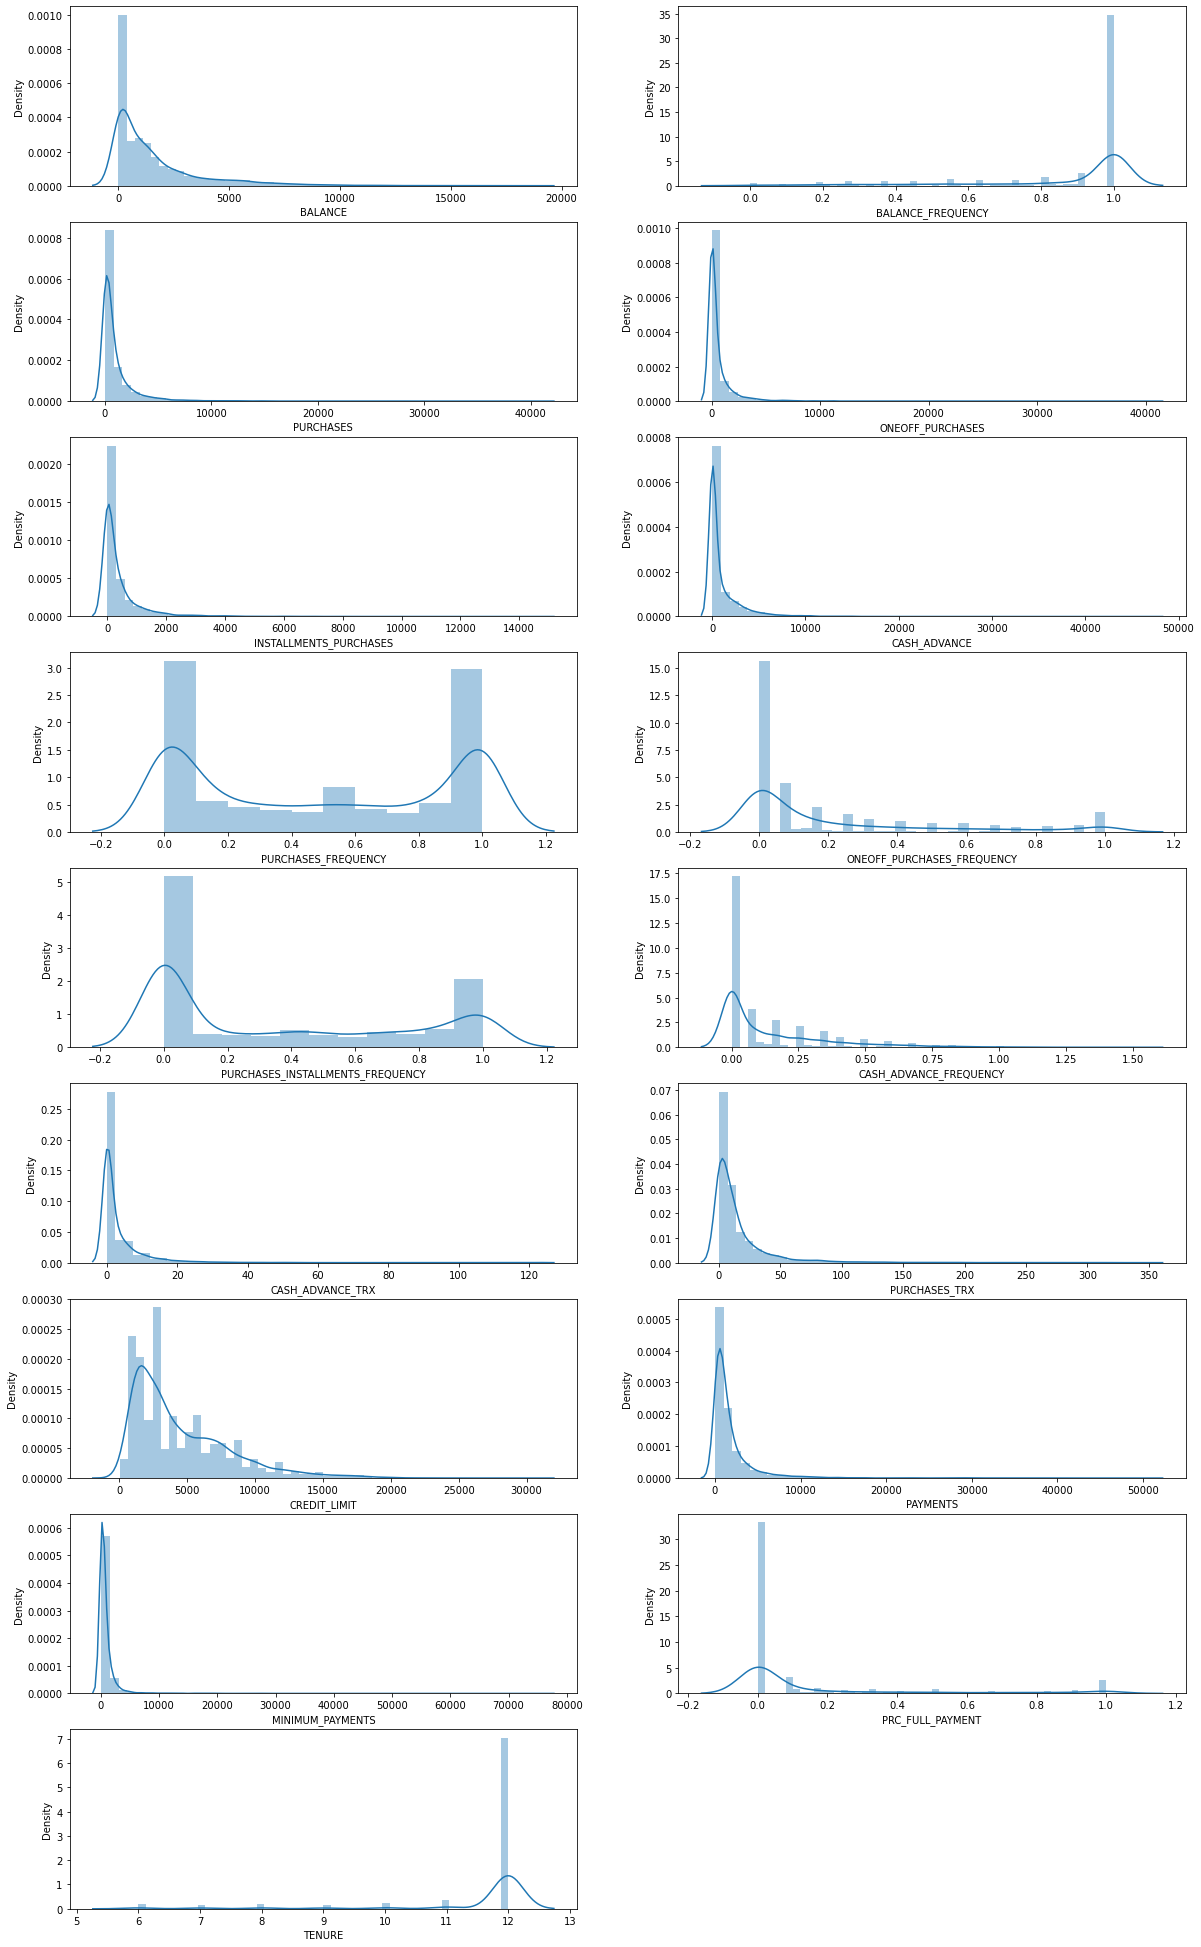

In [8]:
#data visualization to see the distribution
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.distplot(df[col], ax=ax)
    plt.xlabel(col)

On a glance, the majority of the data seems to be extremely skewed and none of them seems to have a normal distribution.

**Handling missing values**

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df[['MINIMUM_PAYMENTS']].isnull().sum()

MINIMUM_PAYMENTS    0
dtype: int64

## Feature Engineering

In [11]:
#splitting for train and inference
train, test = train_test_split(df, test_size=0.2, random_state=101)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (3456, 17)
Test size:  (864, 17)


## Preprocessing Data

**Checking outliers**

In [12]:
def diagnostic_plots(train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=train[variable])
    plt.title('Boxplot')

    plt.show()

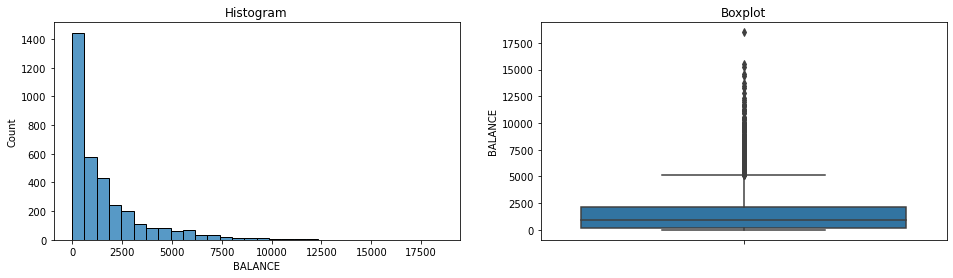

In [13]:
diagnostic_plots(train, 'BALANCE')

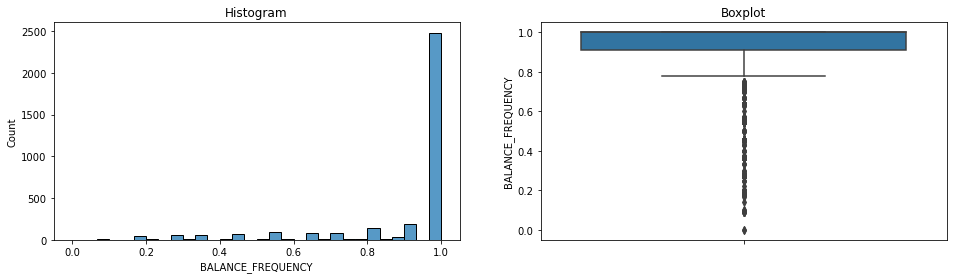

In [14]:
diagnostic_plots(train, 'BALANCE_FREQUENCY')

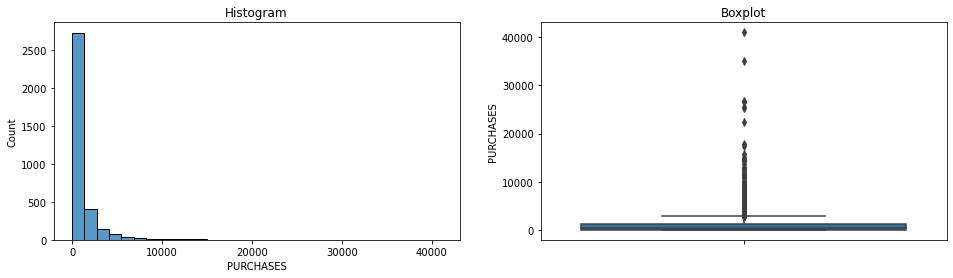

In [15]:
diagnostic_plots(train, 'PURCHASES')

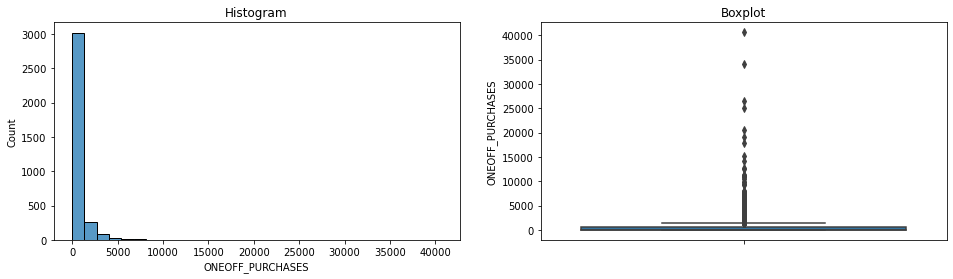

In [16]:
diagnostic_plots(train, 'ONEOFF_PURCHASES')

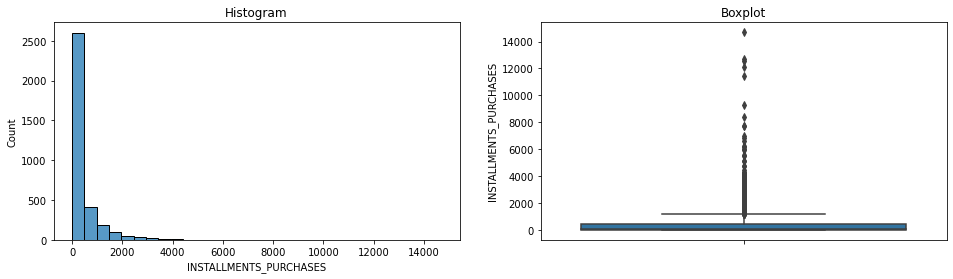

In [17]:
diagnostic_plots(train, 'INSTALLMENTS_PURCHASES')

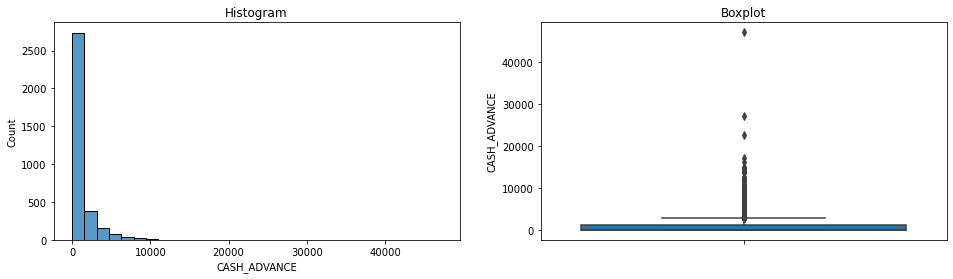

In [18]:
diagnostic_plots(train, 'CASH_ADVANCE')

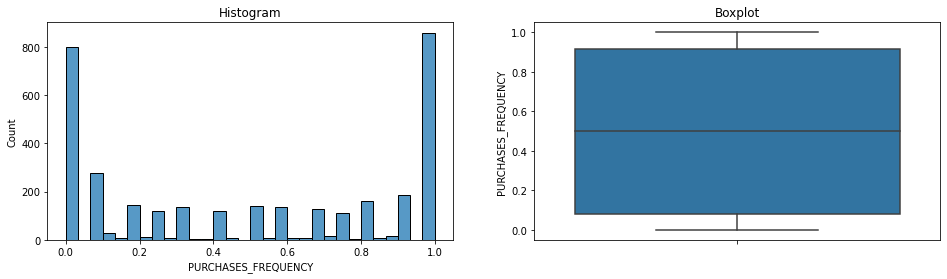

In [19]:
diagnostic_plots(train, 'PURCHASES_FREQUENCY')

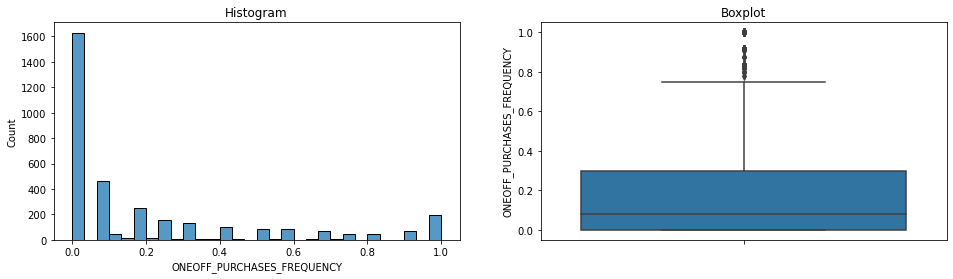

In [20]:
diagnostic_plots(train, 'ONEOFF_PURCHASES_FREQUENCY')

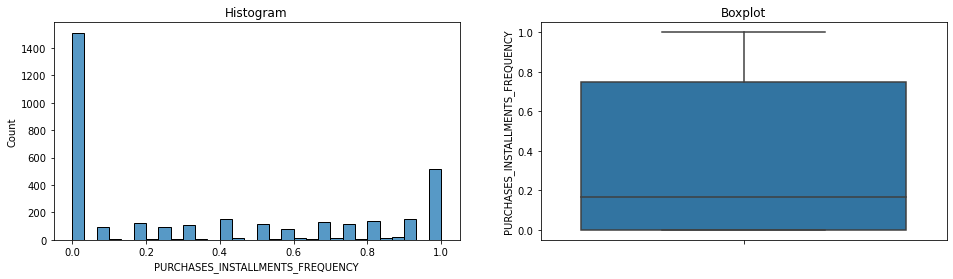

In [21]:
diagnostic_plots(train, 'PURCHASES_INSTALLMENTS_FREQUENCY')

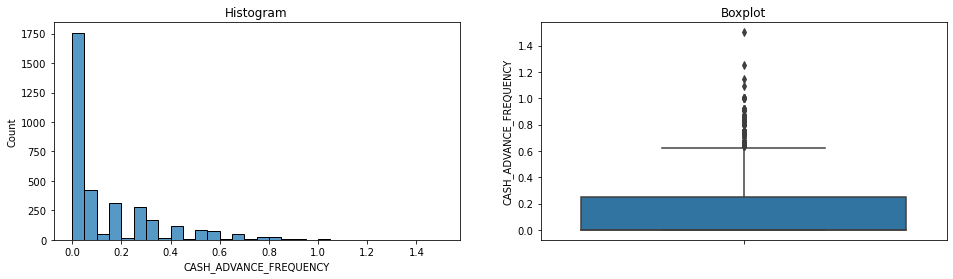

In [22]:
diagnostic_plots(train, 'CASH_ADVANCE_FREQUENCY')

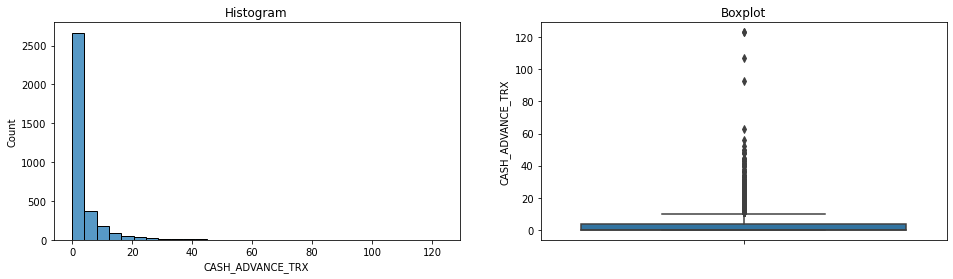

In [23]:
diagnostic_plots(train, 'CASH_ADVANCE_TRX')

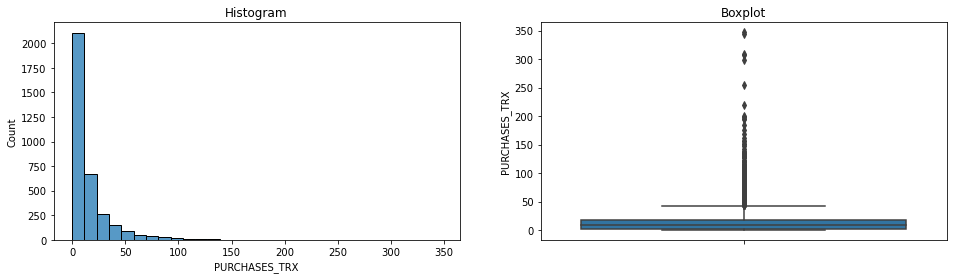

In [24]:
diagnostic_plots(train, 'PURCHASES_TRX')

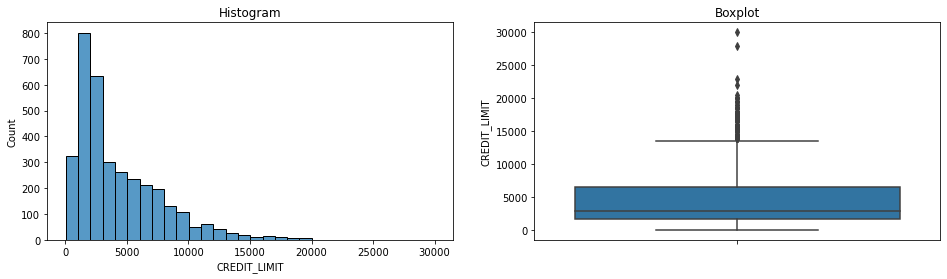

In [25]:
diagnostic_plots(train, 'CREDIT_LIMIT')

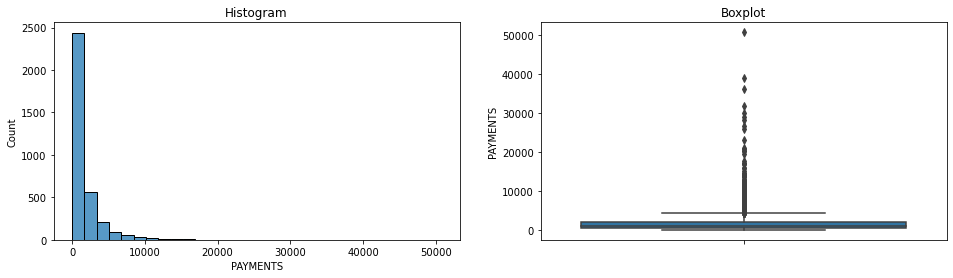

In [26]:
diagnostic_plots(train, 'PAYMENTS')

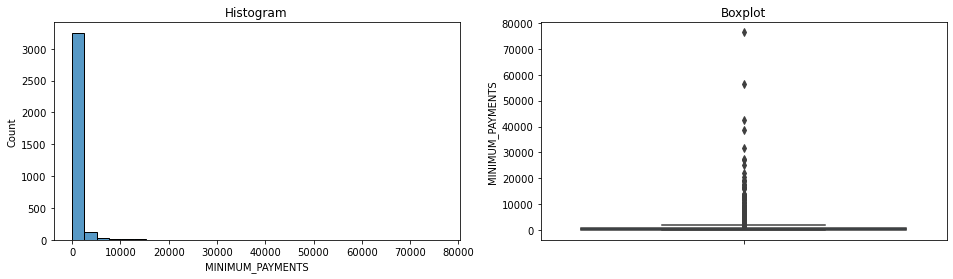

In [27]:
diagnostic_plots(train, 'MINIMUM_PAYMENTS')

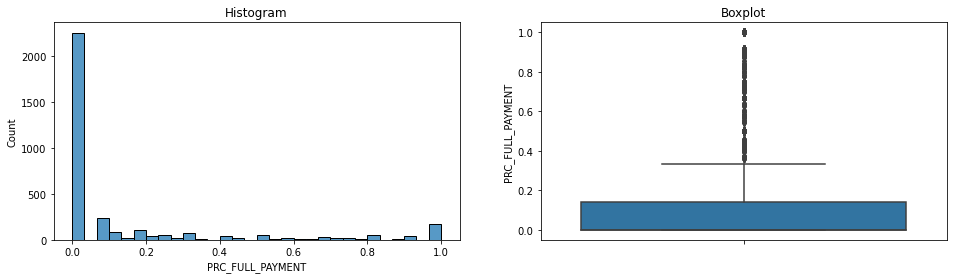

In [28]:
diagnostic_plots(train, 'PRC_FULL_PAYMENT')

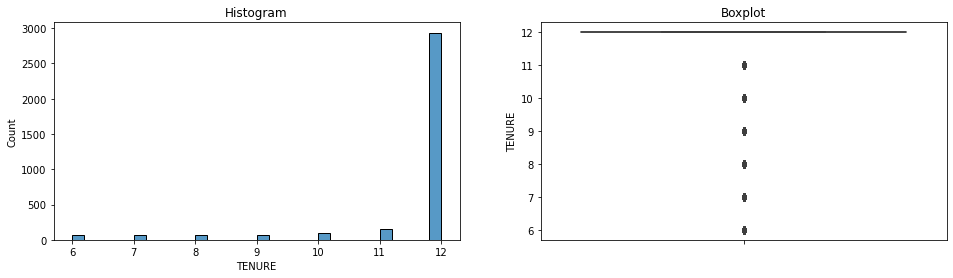

In [29]:
diagnostic_plots(train, 'TENURE')

In [30]:
train.skew()

BALANCE                              2.325950
BALANCE_FREQUENCY                   -2.137506
PURCHASES                            7.217003
ONEOFF_PURCHASES                    10.275049
INSTALLMENTS_PURCHASES               6.163240
CASH_ADVANCE                         6.060764
PURCHASES_FREQUENCY                  0.023028
ONEOFF_PURCHASES_FREQUENCY           1.526294
PURCHASES_INSTALLMENTS_FREQUENCY     0.481368
CASH_ADVANCE_FREQUENCY               1.815558
CASH_ADVANCE_TRX                     6.089518
PURCHASES_TRX                        4.791514
CREDIT_LIMIT                         1.534121
PAYMENTS                             6.054953
MINIMUM_PAYMENTS                    14.132588
PRC_FULL_PAYMENT                     1.964092
TENURE                              -3.085429
dtype: float64

The columns that doesn't have any outliers are only PURCHASES FREQUENCY and PURCHASES INSTALLMENTS FREQUENCY. Therefore, we do not need to winsorize those columns. In this case, I'm also not going to winzorize TENURE since if I did the same treatment to TENURE, it would only have one kind of value.

In [31]:
# Handling outlier with censoring method.
windsoriser = Winsorizer(capping_method='iqr', # Choosing IQR for IQR rule boundaries or gaussian for mean and std.
                          tail='both', # Cap left, right or both tails. We will still be using both.
                          fold=3,
                          variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

windsoriser.fit(train)

df1 = windsoriser.transform(train)

**Feature Scaling**

In [32]:
#defining scaler
scaler = StandardScaler()

In [33]:
#fitting and transforming scaler
scaler.fit(df1)
scaled_data = scaler.transform(df1)

In [34]:
#turning it into dataframe
df_scaled = pd.DataFrame(scaled_data)

In [35]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.045126,0.559496,-0.731035,-0.625003,-0.668441,-0.264174,-1.230822,-0.682725,-0.925891,0.966216,0.694129,-0.772582,0.415499,-0.068549,2.718561,-0.584426,0.353258
1,-0.275332,0.559496,-0.431648,-0.625003,-0.000455,-0.620555,1.245392,-0.682725,1.581365,-0.689017,-0.635398,-0.094677,-0.977648,-0.590439,1.276759,-0.584426,0.353258
2,-0.441428,0.559496,-0.417054,-0.625003,0.032108,-0.620555,0.007285,-0.682725,0.327737,-0.689017,-0.635398,-0.151169,-0.420389,-0.512900,-0.593542,-0.584426,0.353258
3,-0.058965,0.559496,-0.271938,0.165645,-0.668441,-0.620555,-0.611769,0.147745,-0.925891,-0.689017,-0.635398,-0.546613,-0.559704,-0.622251,-0.401443,-0.584426,0.353258
4,-0.115338,0.559496,-0.731035,-0.625003,-0.668441,-0.492498,-1.230822,-0.682725,-0.925891,0.138602,-0.192222,-0.772582,-0.838334,-0.730392,-0.482643,-0.584426,0.353258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,0.928049,0.559496,-0.454013,-0.147920,-0.668441,2.792016,-0.818119,-0.129077,-0.925891,2.207642,2.910007,-0.659597,0.136870,3.002660,1.324192,0.246954,0.353258
3452,-0.342190,0.559496,-0.731035,-0.625003,-0.668441,2.792016,-1.230822,-0.682725,-0.925891,1.380028,0.694129,-0.772582,-0.559704,2.146986,-0.447674,0.413228,0.353258
3453,-0.384904,0.559496,-0.311650,-0.625003,0.267282,-0.620555,1.245392,-0.682725,1.581365,-0.689017,-0.635398,-0.094677,-0.977648,-0.779647,-0.251820,-0.584426,0.353258
3454,-0.819167,-2.196096,-0.597304,-0.625003,-0.370063,-0.620555,-0.405418,-0.682725,-0.090140,-0.689017,-0.635398,-0.546613,0.415499,-0.822899,-0.799832,1.229489,0.353258


**VIF Calculation**

In [36]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_scaled.columns

vif_data["VIF Scores"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns))] 
  
display(vif_data)

,feature,VIF Scores
0,0,4.853816
1,1,1.349912
2,2,19.420420
3,3,11.598723
4,4,7.030604
5,5,3.565683
6,6,11.071075
7,7,5.792194
8,8,11.827254
9,9,6.779540


Based on the score, there are 4 features that are above 10 in vif. This means that those features could be reduced.

## PCA

In [37]:
#checking the best reduction
pca = PCA(n_components = 17).fit(df_scaled)
pca.explained_variance_ratio_

array([0.30218027, 0.23705491, 0.08895868, 0.07912659, 0.06173669,
       0.05180591, 0.04240812, 0.03275767, 0.02801914, 0.02235557,
       0.01357945, 0.01320032, 0.01008461, 0.00791762, 0.00457091,
       0.00262056, 0.00162296])

Text(0, 0.5, 'Kumulatif Explained Var Ratio')

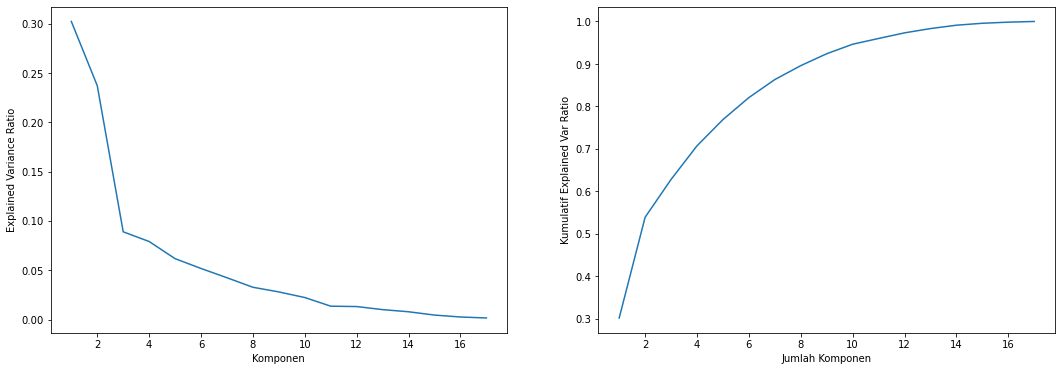

In [38]:
#elbow method
fig,ax=plt.subplots(ncols=2, figsize=(18, 6))
ax[0].plot(range(1,18), pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
#plt.show()

In [39]:
#inputting the intended dimension reduction
pca = PCA(n_components=0.90)
df_pca = pca.fit_transform(df_scaled)

In [40]:
#for visualization
pca2 = PCA(n_components=2)
df_pca2 = pca2.fit_transform(df_scaled)

## Modelling

**K means**

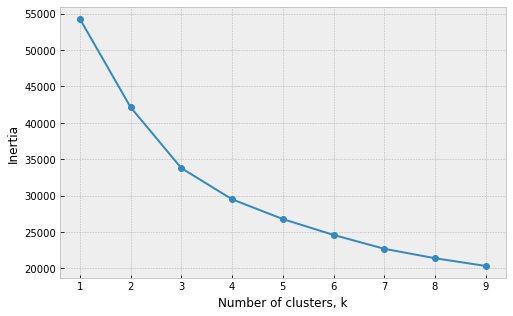

In [41]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [42]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=101).fit(df_pca)
                for k in range(1, 10)]

In [43]:
silhouette_scores = [silhouette_score(df_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

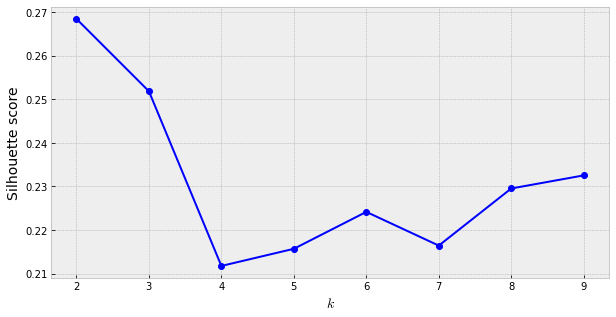

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

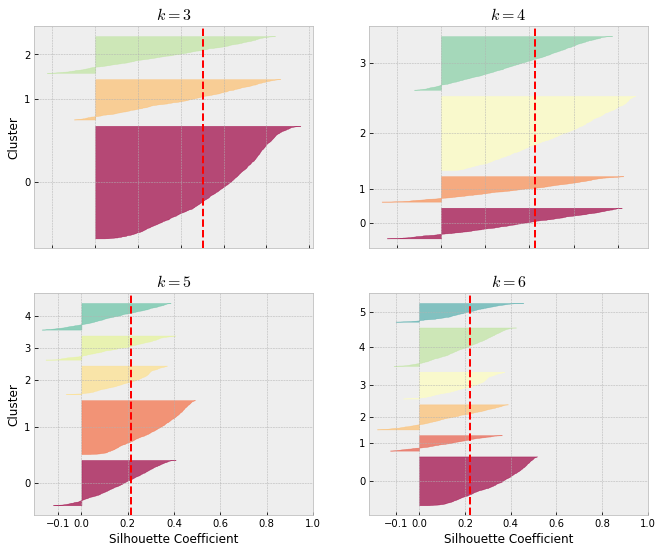

In [45]:
#using silhouette
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_pca, y_pred)

    padding = len(df_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Based on the elbow plot and shilouette plots, it's known that the best k value seems to be 3. Thus, that's what we are going to use.

**Kmeans Lloyd**

In [46]:
#defining and fitting
kmeans = KMeans(n_clusters=3,algorithm= "lloyd", random_state=101)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=101)

In [47]:
kmeans.cluster_centers_

array([[-5.95651271e-01, -1.15627425e+00, -6.44420813e-02,
        -1.14237646e-01,  8.98353294e-03,  4.16157445e-02,
         8.36281185e-03,  1.49058836e-02,  2.09832032e-03],
       [-1.69756732e+00,  2.67127519e+00, -1.15952458e-01,
         3.37455545e-01,  5.68837559e-02, -1.60965204e-01,
         1.54030889e-01,  3.02186737e-02,  5.58891802e-02],
       [ 3.69682953e+00,  6.20166645e-01,  3.25558592e-01,
        -1.95333009e-02, -9.01270262e-02,  4.89067667e-02,
        -1.94963904e-01, -7.90377116e-02, -6.78631859e-02]])

In [48]:
kmeans.inertia_

33790.14049125184

In [49]:
labels = kmeans.labels_
labels

array([1, 0, 0, ..., 0, 0, 0])

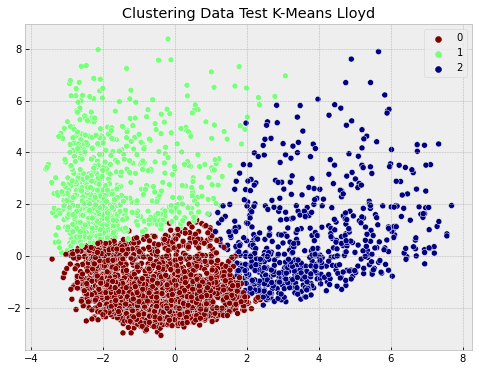

In [50]:
#visualizing k means lloyd
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=df_pca2[:,0], y=df_pca2[:,1], hue=labels, palette='jet_r')
ax.set_title('Clustering Data Test K-Means Lloyd');

**Kmeans Elkan**

In [51]:
#defining and fitting
kmeans_e = KMeans(n_clusters=3, algorithm= "elkan", random_state=101)
kmeans_e.fit(df_pca)

KMeans(algorithm='elkan', n_clusters=3, random_state=101)

In [52]:
kmeans_e.cluster_centers_

array([[-5.95651271e-01, -1.15627425e+00, -6.44420813e-02,
        -1.14237646e-01,  8.98353294e-03,  4.16157445e-02,
         8.36281185e-03,  1.49058836e-02,  2.09832032e-03],
       [-1.69756732e+00,  2.67127519e+00, -1.15952458e-01,
         3.37455545e-01,  5.68837559e-02, -1.60965204e-01,
         1.54030889e-01,  3.02186737e-02,  5.58891802e-02],
       [ 3.69682953e+00,  6.20166645e-01,  3.25558592e-01,
        -1.95333009e-02, -9.01270262e-02,  4.89067667e-02,
        -1.94963904e-01, -7.90377116e-02, -6.78631859e-02]])

In [53]:
labels_e = kmeans_e.labels_
labels_e

array([1, 0, 0, ..., 0, 0, 0])

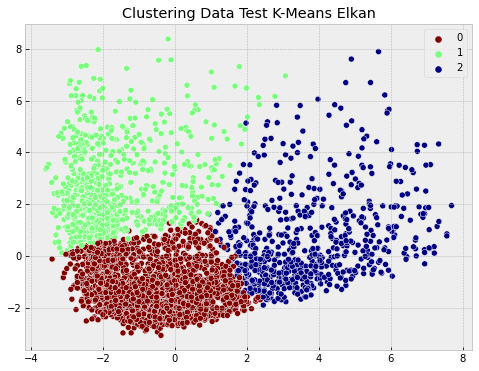

In [54]:
#visualizing k meaans elkan
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=df_pca2[:,0], y=df_pca2[:,1], hue=labels_e, palette='jet_r')
ax.set_title('Clustering Data Test K-Means Elkan');

**Spectral Clustering**

In [55]:
#defining and fitting
SP = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=101)
SP.fit(df_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3, random_state=101)

In [56]:
PCA_df = pd.DataFrame(pca.transform(df_scaled))
PCA_df

,0,1,2,3,4,5,6,7,8
0,-2.070341,2.571335,-0.566716,-1.771482,0.565290,0.770182,0.513778,-0.591357,1.180308
1,0.387478,-0.957163,-2.364746,-1.151795,-0.216939,0.151537,-0.157084,0.021274,0.840310
2,-0.400664,-1.359111,-0.880134,-0.870326,-0.039464,-0.233779,-0.167885,-0.062834,-0.714474
3,-0.880729,-0.973182,0.733195,-1.465016,-0.560982,-0.133827,0.006931,-0.325772,-0.203169
4,-2.150350,-0.738300,0.049082,-1.009636,-0.394052,-0.490395,-0.221197,-0.431800,-0.397286
...,...,...,...,...,...,...,...,...,...
3451,-1.762902,4.845852,0.517597,1.652403,0.481952,-1.665894,-0.288724,-1.259107,0.484991
3452,-2.205144,1.976080,0.536580,1.516631,0.548363,-1.827507,-0.387029,-1.538602,-0.574603
3453,0.462982,-1.582972,-2.128920,-0.690740,-0.406196,-0.257358,-0.244835,0.354208,-0.115912
3454,-0.998138,-2.269096,0.581714,0.801518,1.792393,0.287536,0.216147,0.910981,0.461402


In [57]:
SP.labels_

array([1, 0, 0, ..., 0, 2, 0])

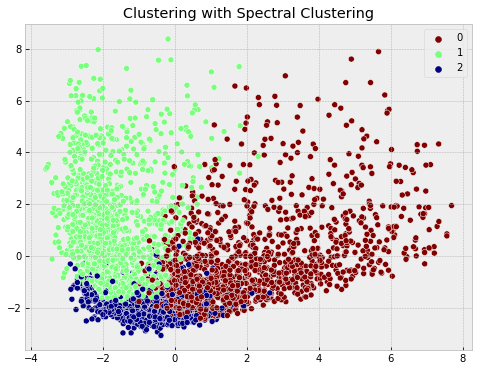

In [58]:
#visualizing spectral clustering
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=df_pca2[:,0], y=df_pca2[:,1], hue=SP.labels_, palette='jet_r')
ax.set_title('Clustering with Spectral Clustering');

**Gaussian Mixture**

In [59]:
#defining and fitting
gmm = GaussianMixture(n_components=3, random_state=101)
gmm.fit(df_pca)

GaussianMixture(n_components=3, random_state=101)

In [60]:
labels_gmm = gmm.predict(df_pca)
labels_gmm

array([1, 1, 1, ..., 1, 2, 2], dtype=int64)

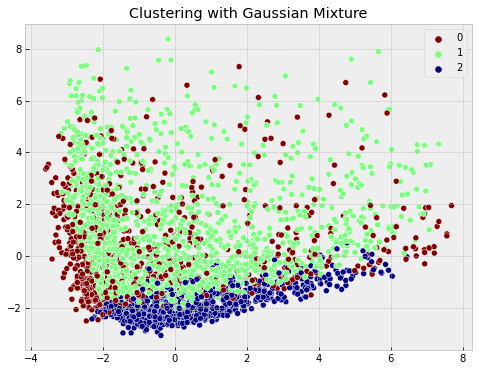

In [61]:
#visualizing gaussian mixture clustering
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=df_pca2[:,0], y=df_pca2[:,1], hue=labels_gmm, palette='jet_r')
ax.set_title('Clustering with Gaussian Mixture');

**Comparing performance of each model**

In [62]:
compare = pd.DataFrame({'Method' : ['K-Means', 'K-Means Elkan', 'Spectral', 'Gaussian Mixture'],
                  'Silhouete Score' : [silhouette_score(df_pca, kmeans.labels_), silhouette_score(df_pca, kmeans_e.labels_), silhouette_score(df_pca, SP.labels_), silhouette_score(df_pca, labels_gmm)]})
compare

,Method,Silhouete Score
0,K-Means,0.251842
1,K-Means Elkan,0.251842
2,Spectral,0.172244
3,Gaussian Mixture,0.085363


From the silhouette score of each method, it seems that both kmeans have the best score. Though changing the algorithm doesn't change the performance much and therefore we are going to choose the base algorithm of kmeans from this point onward.

## Model Inference

In [63]:
#scaling inf data
test_scaled = scaler.transform(test)

test_scaled

array([[-8.15028670e-01,  5.59495813e-01, -5.78799225e-01, ...,
        -7.45843082e-01,  2.74108996e+00, -3.57992233e+00],
       [-5.45650885e-01, -2.88499348e+00,  3.55179610e-01, ...,
         1.09208347e-01, -5.84426398e-01,  3.53257850e-01],
       [-2.90359708e-01,  5.59495813e-01, -5.17043532e-01, ...,
        -5.41098867e-01, -5.84426398e-01,  3.53257850e-01],
       ...,
       [ 3.75735409e+00,  5.59495813e-01,  9.12913312e+00, ...,
         2.27972237e+00, -5.84426398e-01,  3.53257850e-01],
       [-8.06823631e-01, -1.29402046e-01, -6.38705287e-01, ...,
        -5.87296383e-01, -5.84426398e-01,  3.53257850e-01],
       [ 1.45709721e-01,  5.59495813e-01, -7.31034776e-01, ...,
         2.92188469e-03, -5.84426398e-01,  3.53257850e-01]])

In [64]:
#applying pca to inf data
pca_test = pca.transform(test_scaled)

In [65]:
test_kmeans = KMeans(n_clusters=3, max_iter=600, random_state=101)
test_kmeans.fit(pca_test)

KMeans(max_iter=600, n_clusters=3, random_state=101)

In [66]:
#defining the labels for ease ofo use
lab = test_kmeans.labels_
lab

array([0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0,

Text(0.5, 1.0, 'Clustering Data Test K-Means')

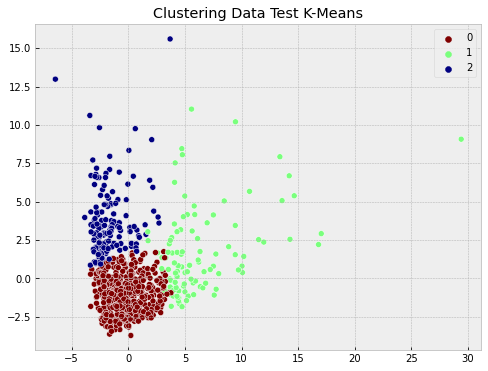

In [67]:
#plotting clustering test data
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pca_test[:,0], y=pca_test[:,1], hue=test_kmeans.labels_, palette='jet_r')
ax.set_title('Clustering Data Test K-Means')

## EDA

In [68]:
#creating new column for the clusters
train['id'] = kmeans.labels_
test['id'] = lab

In [69]:
#turning it into a dataframe
data_coun = pd.concat([train, test], axis=0, ignore_index=True)
data_coun

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,id
0,5499.895765,1.000000,0.00,0.00,0.00,485.269985,0.000000,0.000000,0.000000,0.333333,6,0,6000.0,1445.294493,2703.217084,0.000000,12,1
1,1052.127315,1.000000,354.48,0.00,354.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,571.417096,1618.201652,0.000000,12,0
2,733.760958,1.000000,371.76,0.00,371.76,0.000000,0.500000,0.000000,0.500000,0.000000,0,11,3000.0,701.251972,210.722512,0.000000,12,0
3,1466.852542,1.000000,543.58,543.58,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,4,2500.0,518.150669,355.284593,0.000000,12,0
4,1358.798385,1.000000,0.00,0.00,0.00,174.369769,0.000000,0.000000,0.000000,0.166667,2,0,1500.0,337.074078,294.178618,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,294.720216,1.000000,1880.00,0.00,1880.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,1479.018473,87.232429,1.000000,6,0
4316,21.494012,0.545455,417.00,0.00,417.00,0.000000,0.416667,0.000000,0.416667,0.000000,0,6,5000.0,394.135239,97.638234,0.454545,12,0
4317,8781.831676,1.000000,11674.64,9400.96,2273.68,0.000000,1.000000,1.000000,0.916667,0.000000,0,93,16000.0,10377.361200,2372.972810,0.000000,12,1
4318,33.384649,0.909091,109.32,69.32,40.00,0.000000,0.500000,0.166667,0.250000,0.000000,0,6,1200.0,163.060103,215.422442,0.000000,12,0


In [70]:
#checking how many data in each cluster
data_coun['id'].value_counts()

0    2656
1     840
2     824
Name: id, dtype: int64

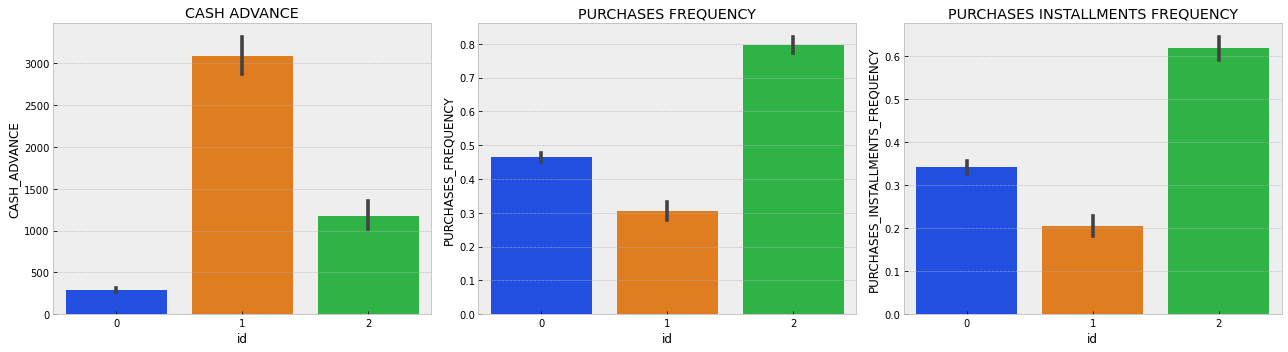

In [71]:
# visualising clusters
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'id', y = 'CASH_ADVANCE', data=data_coun, palette="bright")
plt.title('CASH ADVANCE')

plt.subplot(1,3,2)
sns.barplot(x = 'id', y = 'PURCHASES_FREQUENCY', data=data_coun, palette="bright")
plt.title('PURCHASES FREQUENCY')

plt.subplot(1,3,3)
sns.barplot(x = 'id', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', data=data_coun, palette="bright")
plt.title('PURCHASES INSTALLMENTS FREQUENCY')

plt.tight_layout()

plt.show()

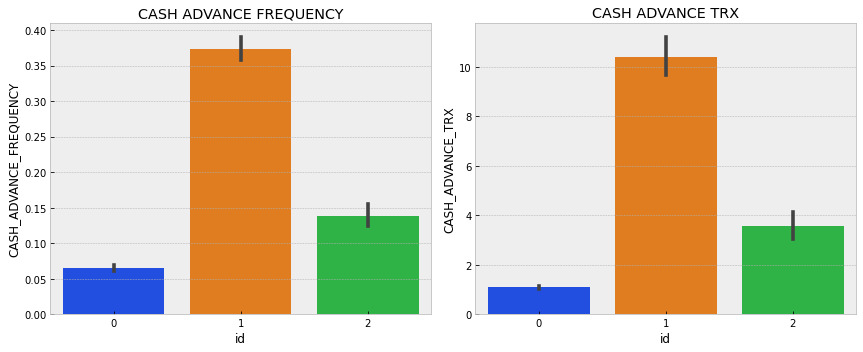

In [72]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'id', y = 'CASH_ADVANCE_FREQUENCY', data=data_coun, palette="bright")
plt.title('CASH ADVANCE FREQUENCY')

plt.subplot(1,3,2)
sns.barplot(x = 'id', y = 'CASH_ADVANCE_TRX', data=data_coun, palette="bright")
plt.title('CASH ADVANCE TRX')

plt.tight_layout()
plt.show()

The groups are separated into 3 clusters.

Group 0 is characterized by medium purchase, low frequency in cash advance being paid, and low number of transactions made in cash in advanced.
Group 1 is characterized by medium purchase, high cash in advance given by the user, high cash in advance being paid, and high number of transactions made in cash in advanced.
Group 2 is characterized by high purchase, medium cash in advance given by the user, medium in cash in advance being paid, and medium number of transactions made in cash in advanced.

## Conclusion

The result from the clustering of the data is that Group 0 is characterized by medium purchase, low frequency in cash advance being paid, and low number of transactions made in cash in advanced. Group 1 is characterized by medium purchase, high cash in advance given by the user, high cash in advance being paid, and high number of transactions made in cash in advanced, and Group 2 is characterized by high purchase, medium cash in advance given by the user, medium in cash in advance being paid, and medium number of transactions made in cash in advanced. 

## Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

1. Inertia is a measure that tells us how far the distance of points within a cluster are. A minimum inertia should make better clustering, and therefore we should aim for smaller inertia.

source: https://datamahadev.com/understanding-k-means-clustering/

2. Due to its simplicity, the elbow approach is one of the most used techniques for determining the ideal k value for kmeans. The best value of k should be chosen by first calculating the Within-Cluster-Sum of Squared Errors for various values of k, and then by examining the graph and selecting the k value where the line bends the greatest or the WSS begins to decline. The disadvantage of using elbow method is that the elbow method is deemed to be more subjective than other methods and that it might not work in some datasets.

source: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb#:~:text=The%20Elbow%20Method,-This%20is%20probably&text=Calculate%20the%20Within%2DCluster%2DSum,Errors%20sounds%20a%20bit%20complex.

3. Gaussian Mixtures attempts to cluster by assuming all the data points are generated from a gaussian distributions.

Spectral clustering attempts to cluster by treating the data as nodes of graph and then mapping them on a lower dimensional space.

Kmeans attempts to cluster by taking data points as input and then inputs them into clusters by the centroids.